# Smooth Approximation


Let's note $\varphi_s(t) = \frac{1}{s \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{t}{s} \right)^2}$ the density of a Gaussian random variable with variance $s^2$ and $F(x)$ its cumulative distribution function.

We are interested in computing smooth approximations of f.

Let's consider a function f which is constant by part. Then its Gaussian convolution is analytically:

$$ \tilde f(x) = \int_\R f(t) \varphi_s(x-t) dt = \int_{-\infty}^{x_0} f_- \varphi_s(x-t) dt + \sum_{i=0}^{N-1} \int_{x_i}^{x_{i+1}} f_i \varphi_s(x-t) dt + \int_{x_N}^{\infty} f_+ \varphi_s(x-t) dt$$ 

with change of variable $t = x - u$:

$$=f_-\int_{x-x_0}^{\infty}  \varphi_s(u) du + \sum_{i=0}^{N-1} f_i \int_{x-x_{i+1}}^{x-x_{i}}  \varphi_s(u) du + f_+ \int_{-\infty}^{x-x_N} \varphi_s(u) du\\
=f_-(1- F(x-x_0)) + \sum_{i=0}^{N-1} f_i (F(x-x_{i}) - F(x-x_{i+1})) + f_+ F(x-x_N)$$

Thus we, can write the convolution using the cumulative distribution function of the Gaussian distribution and the values of f.

Define a piecewise constant function:
\begin{equation*}
f(x) =
\begin{cases}
1 & \text{if } x < -5 \\
2 & \text{if } -5 \leq x < -4 \\
3 & \text{if } -4 \leq x < -3 \\
4 & \text{if } -3 \leq x < -2 \\
5 & \text{if } -2 \leq x < -1 \\
6 & \text{if } -1 \leq x < 0 \\
5 & \text{if } 0 \leq x < 1 \\
4 & \text{if } 1 \leq x < 2 \\
3 & \text{if } 2 \leq x < 3 \\
2 & \text{if } 3 \leq x < 4 \\
1 & \text{if } 4 \leq x < 5 \\
0 & \text{if } 5 \leq x \\
\end{cases}
\end{equation*}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
from scipy.signal import fftconvolve

In [2]:
def f(x):
    if x < -5:
        return 1
    elif -5 <= x < -4:
        return 2
    elif -4 <= x < -3:
        return 3
    elif -3 <= x < -2:
        return 4
    elif -2 <= x < -1:
        return 5
    elif -1 <= x < 0:
        return 6
    elif 0 <= x < 1:
        return 5
    elif 1 <= x < 2:
        return 4
    elif 2 <= x < 3:
        return 3
    elif 3 <= x < 4:
        return 2
    elif 4 <= x < 5:
        return 1
    else:
        return 0

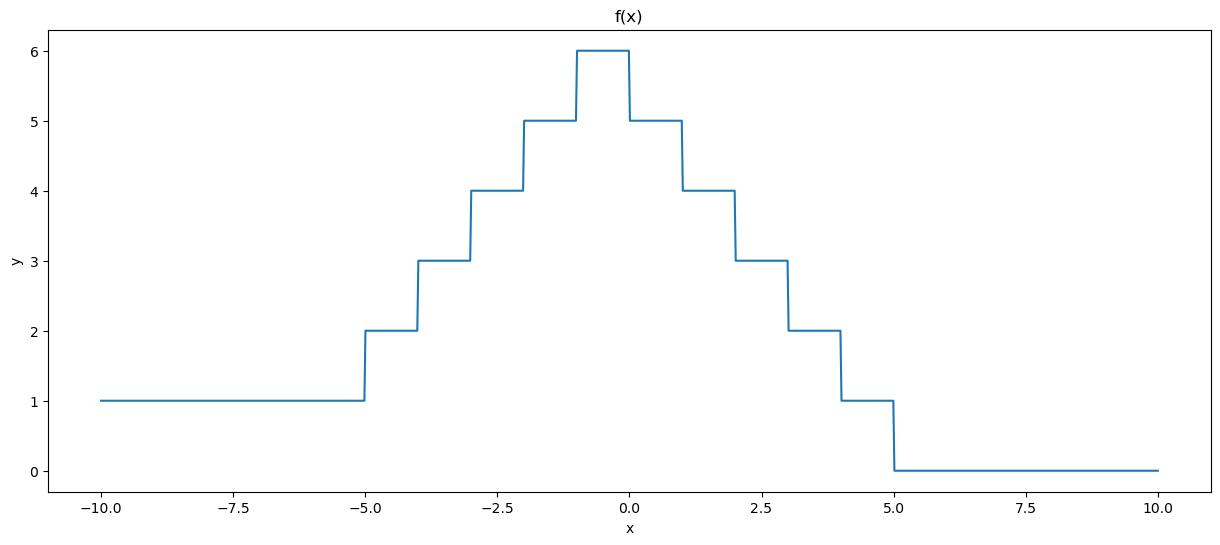

In [21]:
x = np.linspace(-10, 10, 1000)
y = [f(xi) for xi in x]

plt.figure(figsize=(15, 6))
plt.plot(x, y)
plt.title('f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The smooth approximation is given by:

In [4]:
def smoothed(x,s):
    a = 1 * (1-norm.cdf(x +5, scale=s))
    b=[2,3,4,5,6,5,4,3,2,1]
    c=np.linspace(-5,5,11)
    for i in range(10):
        a += b[i] * (norm.cdf(x-c[i], scale=s)-norm.cdf(x-c[i+1],scale=s))
    return a

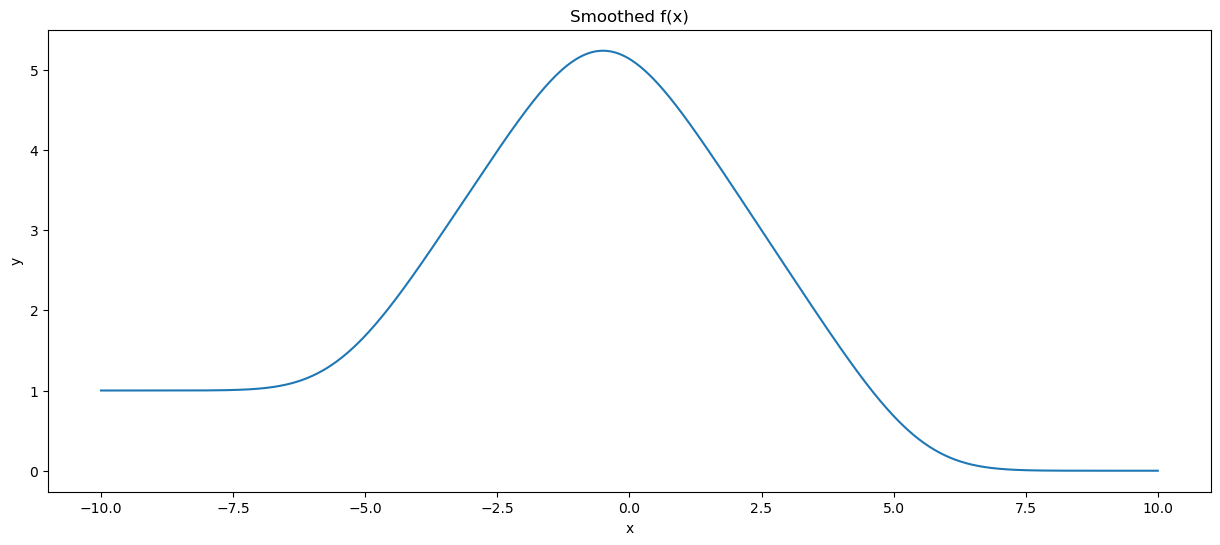

In [22]:
x=np.linspace(-10,10,1000)
y=[smoothed(xi,1) for xi in x]

plt.figure(figsize=(15,6))
plt.plot(x,y)
plt.title('Smoothed f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

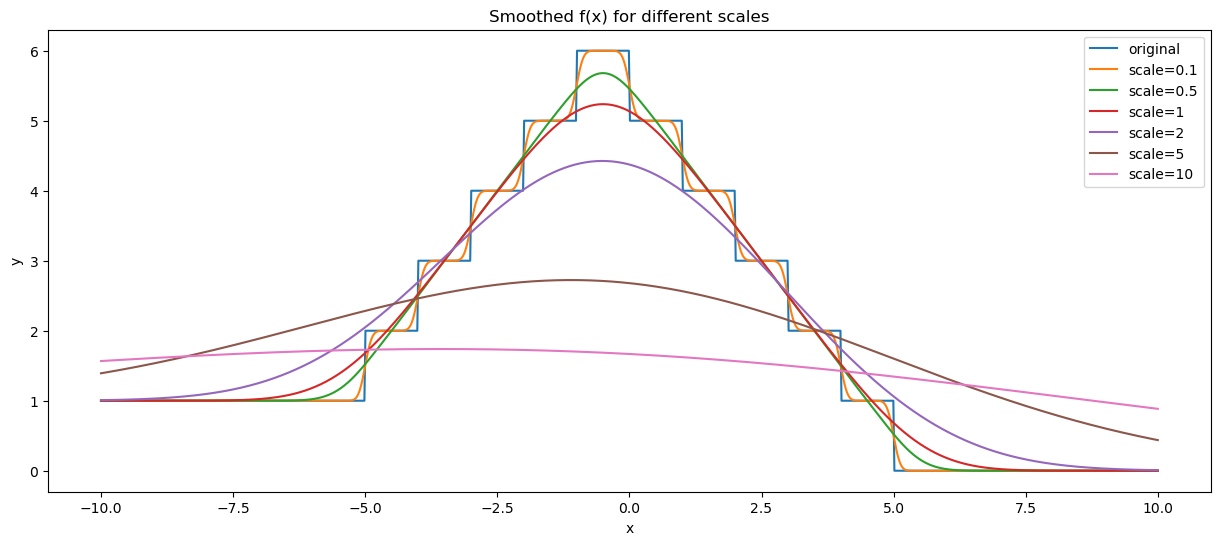

In [23]:
x=np.linspace(-10,10,1000)
scale=[0.1,0.5,1,2,5,10]
y1 = [f(xi) for xi in x]
plt.figure(figsize=(15,6))
plt.plot(x,y1, label='original')
for s in scale:
    y=[smoothed(xi,s) for xi in x]
    plt.plot(x,y,label='scale='+str(s))
plt.legend()
plt.title('Smoothed f(x) for different scales')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

/var/folders/0c/w1dzj8s15bb49___j02zj7qh0000gn/T/ipykernel_29025/3684320872.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, -1000, 1000)[0]


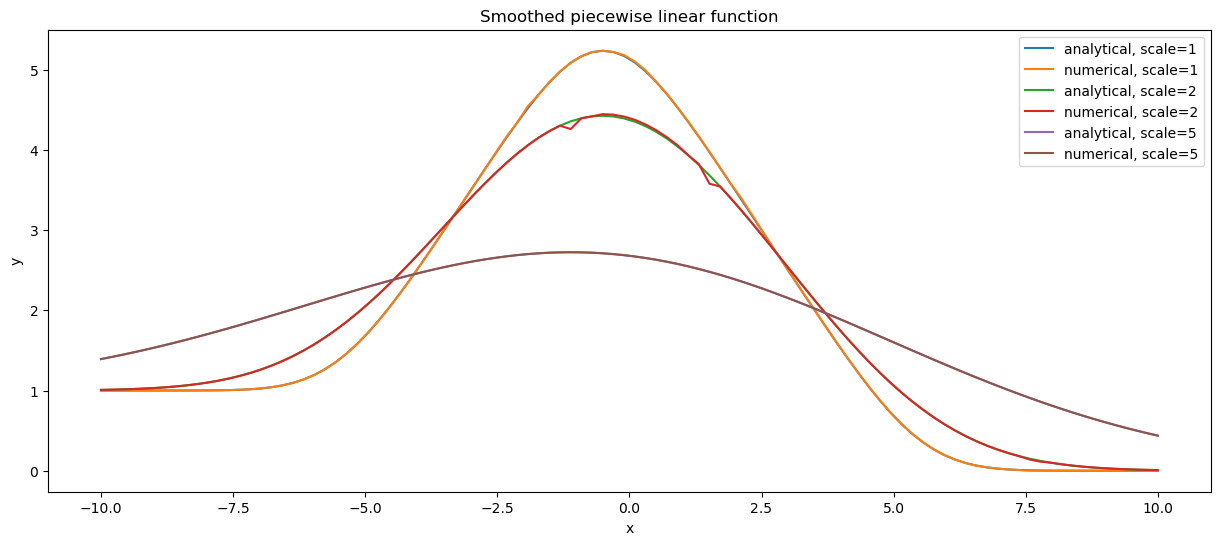

In [25]:
def gaussian_pdf(x,s):
    return norm.pdf(x, scale=s)

def bruteforce_smoothed(x, s, f):
    integrand = lambda t: f(t) * gaussian_pdf(x - t, s)
    return quad(integrand, -1000, 1000)[0]

x=np.linspace(-10,10,100)
scale=[1,2,5]

plt.figure(figsize=(15,6))
for s in scale:
    y1=[smoothed(xi,s) for xi in x]
    y2=[bruteforce_smoothed(xi,s,f) for xi in x]
    plt.plot(x,y1,label='analytical, scale='+str(s))
    plt.plot(x,y2,label='numerical, scale='+str(s))
plt.legend()
plt.title('Smoothed piecewise linear function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

/var/folders/0c/w1dzj8s15bb49___j02zj7qh0000gn/T/ipykernel_29025/3684320872.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, -1000, 1000)[0]


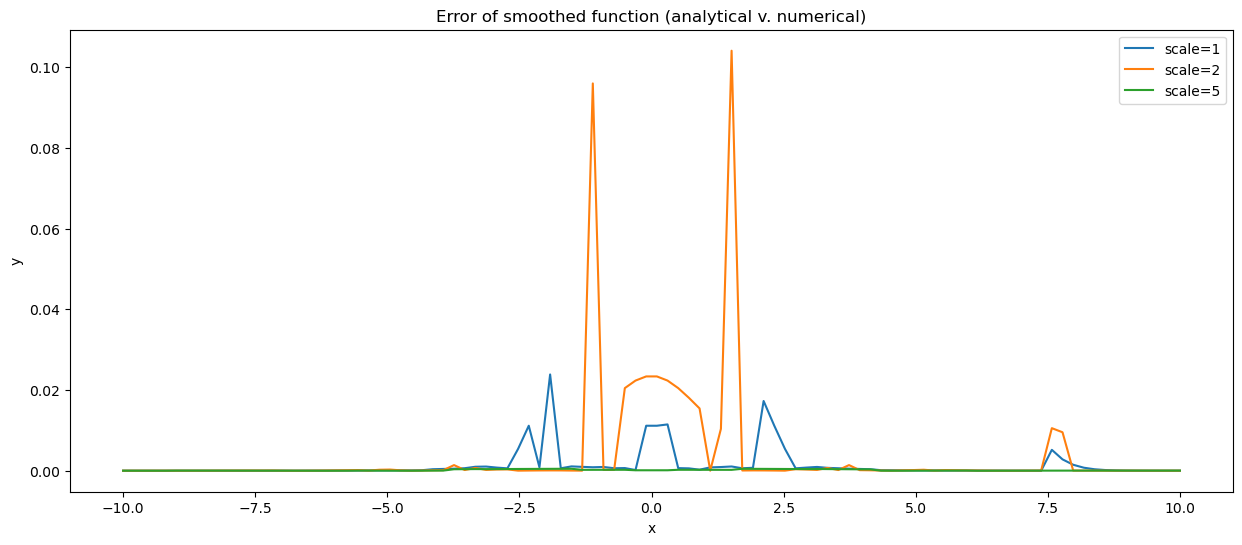

In [27]:
# plot the errors
plt.figure(figsize=(15,6))
for s in scale:
    y1=[smoothed(xi,s) for xi in x]
    y2=[bruteforce_smoothed(xi,s,f) for xi in x]
    plt.plot(x, np.abs(np.array(y1)-np.array(y2)), label='scale='+str(s))

plt.title('Error of smoothed function (analytical v. numerical)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
x=np.linspace(-10,10,100)
%timeit y1=[bruteforce_smoothed(xi,1,f) for xi in x]
%timeit y2=[smoothed(xi,1) for xi in x]

6.09 s ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
55.6 ms ± 764 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Results are very similar in terms of precision but the analytical approach is 100x faster.

Now, let's use Scipy FFTconvolve function to compute the convolution.

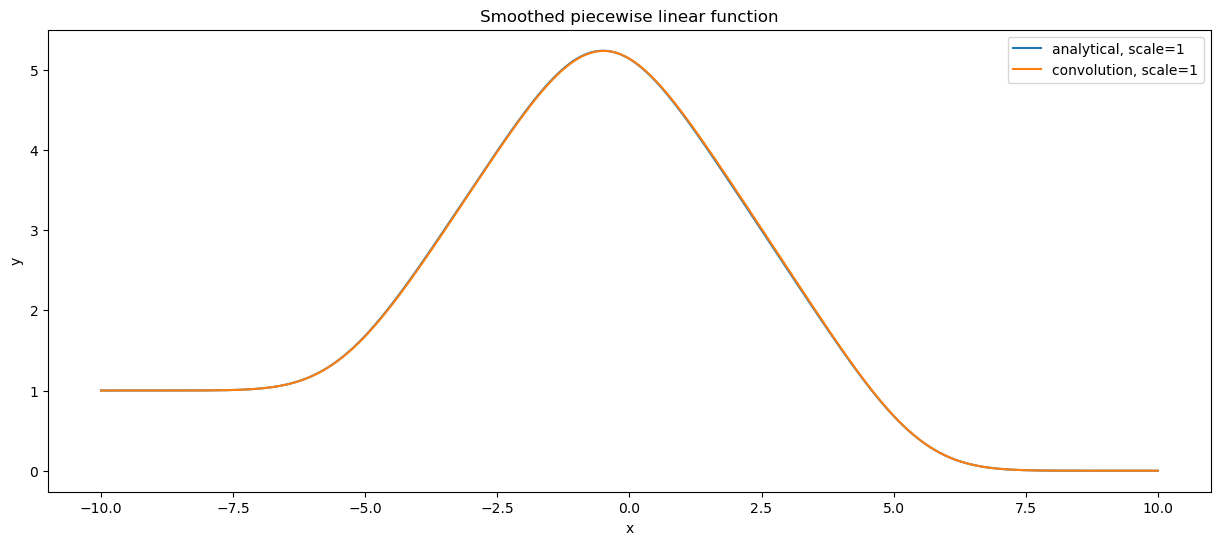

In [17]:
def convolve(x, s, f):
    t = np.linspace(-15, 15, 1000)  # change length to match x1
    y = [f(ti) for ti in t]
    kernel = gaussian_pdf(t, s)
    conv = fftconvolve(y, kernel, mode='same') / np.sum(kernel)
    return np.interp(x, t, conv)


x=np.linspace(-10,10,1000)
scale=[1]

plt.figure(figsize=(15,6))
for s in scale:
    y2=[smoothed(xi,s) for xi in x]
    y3=[convolve(xi,s,f) for xi in x]
    plt.plot(x,y2,label='analytical, scale='+str(s))
    plt.plot(x,y3,label='convolution, scale='+str(s))
plt.legend()
plt.title('Smoothed piecewise linear function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Notice we have to extend the interval of computation to avoid boundary effects.

The precision is great.

In [20]:
x=np.linspace(-10,10,1000)
%timeit yy=[smoothed(xi,1) for xi in x]
%timeit yyy=[convolve(xi,1,f) for xi in x]

551 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
435 ms ± 9.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We achieve comparable results.